In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.ndimage as ndimage
import scipy.ndimage as nd
import scipy.interpolate as interpolate
import seaborn as sns
from matplotlib import rcParams
import math
import pandas as pd
from scipy import stats
%matplotlib inline

In [2]:
rcParams['font.sans-serif'] = ['Arial'] 
rcParams['font.size'] = 6 #7
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

rcParams['axes.linewidth'] = 0.5
rcParams['lines.linewidth'] = 0.5
rcParams['lines.markersize'] = 2.5
rcParams['lines.markeredgewidth'] = 0.0

rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5

to_inch = 0.393701
fwidth_cm = 10 
fheight_cm = 10. # cm

spwidth_cm = 1.5
spheight_cm = 3.


w = spwidth_cm/fwidth_cm
h = spheight_cm/fheight_cm

fwidth_inch = fwidth_cm * to_inch
fheight_inch = fheight_cm * to_inch

cmap = plt.cm.magma

lw_scatter = 0.4
ticks_fontsize = 6. 
spines_thickness = 0.5
ticks_width = spines_thickness
s_scatter = 8  # 10
lw_hlines = 1.0
lw_stats_bar = 0.6
lw_scatter = 0.2
alpha_scatter = 0.6
width_bars = 1.5
tick_length = 3.
markersize_rasterdots = 1.5 
fs = 6.
lw = 0.3 
ms = 1.5 

color_mpw = np.array([242,101,34])/255
color_su = [0.3,0.3,0.3] 
color_EXC = 'dimgray' 
color_INH = np.array([62,185,236.])/255 
    
despine_offset = 2

In [3]:
data_dir = '/.../Data/' 

## Plot panel 5 B

305
0.0003469450722898286


Text(1, 80.0, '0.0003469450722898286')

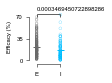

In [4]:
# 5B) Contribution 
Data_Figure5 = np.load(data_dir + 'Data_Figure5.npy', encoding='latin1', allow_pickle=True).item()
Contribution = Data_Figure5['Contribution'] 
Mean_FR_NM_pairs = Data_Figure5['Mean_FR_NM_pairs']
exc_idx = Data_Figure5['mask_EXC'] 
inh_idx = Data_Figure5['mask_INH']

Contribution_EXC = Contribution[exc_idx]
Contribution_INH = Contribution[inh_idx]

contributions = list(Contribution_INH) + list(Contribution_EXC)

inh = len(Contribution_INH)*['INH']
exc = len(Contribution_EXC)*['EXC']
cell_types = inh + exc
print(len(cell_types))

colors = [color_EXC, color_INH]

aa = np.ones(len(Contribution_EXC))*1 
bb = np.ones(len(Contribution_INH))*3

stats_tmp= stats.ranksums(Contribution_EXC, Contribution_INH)
print(stats_tmp[1])

ylim_percentage = 80.

fig = plt.figure()
plt.clf()
fig.set_size_inches(fwidth_inch,fheight_inch)

ax_5B = plt.axes([0.1,0.1, 0.12, 0.18])
ax_5B.tick_params(length=tick_length)
ax_5B.tick_params(labelsize=ticks_fontsize)  # ticks size font
plt.scatter(aa, Contribution_EXC,  s=8, facecolors='none', edgecolors='dimgray', linewidths=lw_scatter) #
plt.scatter(bb, Contribution_INH,  s=8, facecolors='none', edgecolors='deepskyblue', linewidths=lw_scatter) 
positions_x = [1, 3]
labels_x = ['E',  'I']
ax_5B.hlines(y=np.mean(Contribution_EXC), xmin=0.7, xmax=1.3, linewidth=lw_hlines, color='dimgray')
ax_5B.hlines(y=np.mean(Contribution_INH), xmin=2.7, xmax=3.3, linewidth=lw_hlines, color='deepskyblue')
ax_5B.set_yticks([0,35,70])
ax_5B.set_ylabel('Efficacy (%)') 
ax_5B.set_xticks(positions_x )  
ax_5B.set_xticklabels(labels_x, fontsize=2)
sns.despine(offset=despine_offset , trim=True) 
ax_5B.hlines(y=ylim_percentage-5, xmin=1., xmax=3., linewidth=lw_stats_bar, color='k')
ax_5B.vlines(x=1, ymin=ylim_percentage-10, ymax=ylim_percentage-5, linewidth=lw_stats_bar, color='k')  
ax_5B.vlines(x=3, ymin=ylim_percentage-10, ymax=ylim_percentage-5, linewidth=lw_stats_bar, color='k') 
ax_5B.text(1, ylim_percentage, str(stats_tmp[1])) 

## Plot panel 5 B Cumulative Distribution

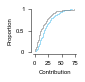

In [6]:
# 5 B) cumulative Dist 
ax_5B2 = plt.axes([0.4,0.1, 0.1, 0.15])
ax_5B2.tick_params(length=tick_length)
ax_5B2.spines['right'].set_visible(False)
ax_5B2.spines['top'].set_visible(False)
df_Contribution = pd.DataFrame()
df_Contribution['Contribution']  = contributions
df_Contribution['cell_types']  = cell_types
sns.ecdfplot(data=df_Contribution, x="Contribution", hue="cell_types", stat = 'proportion' ,  palette=colors, legend=False)
x_labels = [0, 25,50, 75]
x_positions = [0, 25,50, 75]
y_labels = [0, 0.5, 1]
y_positions =  [0, 0.5, 1]
ax_5B2.set_yticks(y_positions)
ax_5B2.set_yticklabels(y_labels)
sns.despine(ax= ax_5B2, offset=despine_offset , trim=False)
ax_5B2.set_xticks(x_positions)

## Plot panel 5 C

Text(0.5, 0.35, 'clusters filtered SL SD responses')

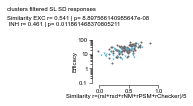

In [7]:
# 5 C) Contribution vs Similarity
SimilarityIndex = np.load(data_dir + 'SimilarityIndex.npy', encoding='latin1', allow_pickle=True).item()
SimilarityIndex_EXC = SimilarityIndex['EXC'] 
SimilarityIndex_INH = SimilarityIndex['INH'] 
mask_SLSD_EXC = SimilarityIndex['mask_SLSD_EXC'] 
mask_SLSD_INH = SimilarityIndex['mask_SLSD_INH'] 
SimilarityIndex_all = SimilarityIndex['all'] 
Contribution_EXC_SNRSLSD = Contribution[mask_SLSD_EXC]
Contribution_INH_SNRSLSD = Contribution[mask_SLSD_INH]

lim_eff_cont = [0.1, 100]   #y 
lim_Similarity = [-0.1, 1]  # x

x_ticks = [0., 0.5, 1.]
y_ticks = [0.1, 1, 10, 100]

tick_width = 0.5

w = 0.15  # 0.2
h = 0.15 # 0.2
ms = 2  # markersize

ax_3C = plt.axes([0.7, 0.1, w, h])
ax_3C.tick_params(labelsize=fs)  #
ax_3C.tick_params(length=tick_length)
ax_3C.tick_params(labelsize=ticks_fontsize)
plt.plot(SimilarityIndex_EXC, Contribution_EXC_SNRSLSD, 'o', color=color_EXC, label='EXC', markersize=ms)
plt.plot(SimilarityIndex_INH, Contribution_INH_SNRSLSD, 'v', color=color_INH, label='INH', markersize=ms)   
ax_3C.set_xlabel('Similarity r=(rsl+rsd+rNM+rPSM+rChecker)/5', labelpad=0)
ax_3C.set_ylabel('Efficacy', labelpad=0)
plt.xlim(lim_Similarity)
plt.ylim(lim_eff_cont)
ax_3C.set_yscale('log')
ax_3C.set_xticks(x_ticks)
ax_3C.set_xticklabels(x_ticks)
ax_3C.set_yticks(y_ticks)
ax_3C.set_yticklabels(y_ticks)

sns.despine(ax=ax_3C, offset=2, trim=True)

slope_EXC, intercept_EXC, r_value_EXC, p_value_EXC, std_err_EXC = stats.linregress(SimilarityIndex_EXC, np.log(Contribution_EXC_SNRSLSD))
slope_INH, intercept_INH, r_value_INH, p_value_INH, std_err_INH = stats.linregress(SimilarityIndex_INH, np.log(Contribution_INH_SNRSLSD))

plt.tick_params('both', pad=1)  


plt.figtext(0.5, 0.3, 'Similarity EXC r= %s | p= %s \n INH r= %s | p= %s '%(r_value_EXC.round(3), p_value_EXC, r_value_INH.round(3), p_value_INH ))
plt.figtext(0.5, 0.35, 'clusters filtered SL SD responses')


## Plot panel 5 D

[[ 1.         -0.15078591]
 [-0.15078591  1.        ]]
[[ 1.         -0.48386413]
 [-0.48386413  1.        ]]


Text(0.01, 0.39, 'stas.linregress INH r -0.48386 | p 0.00000118')

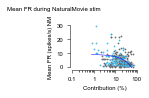

In [11]:
# 5 D) Contribution vs Mean FR (total recording))
x_EXC = Contribution_EXC  
y_EXC = Mean_FR_NM_pairs[exc_idx] 

x_INH = Contribution_INH  
y_INH =  Mean_FR_NM_pairs[inh_idx]

s_scatter = 0.5

x_lim = [0, 100]
y_lim = [-1, 30]

x_lim_log = [0.1, 100]
x_ticks_log = [0.1, 1, 10, 100]
ax_5D_NM = plt.axes([0.2,0.6,0.15,0.15]) 
ax_5D_NM.tick_params(length=tick_length)
ax_5D_NM.spines['right'].set_visible(False)
ax_5D_NM.spines['top'].set_visible(False)
ax_5D_NM.tick_params(length=tick_length)
plt.scatter(x_EXC, y_EXC, s=s_scatter, color=color_EXC)
plt.plot(np.unique(x_EXC), np.poly1d(np.polyfit(x_EXC, y_EXC, 1))(np.unique(x_EXC)), color='gray')  # add line of best fit
plt.scatter(x_INH, y_INH, s=s_scatter,color=color_INH)
plt.plot(np.unique(x_INH), np.poly1d(np.polyfit(x_INH, y_INH, 1))(np.unique(x_INH)), color='blue') 
ax_5D_NM.set_xlabel('Contribution (%)')
ax_5D_NM.set_ylabel('Mean FR (spikes/s) NM')
ax_5D_NM.set_xlim(x_lim_log)
ax_5D_NM.set_ylim(y_lim)
ax_5D_NM.set_xscale('log')
ax_5D_NM.set_xticks(x_ticks_log)
ax_5D_NM.set_xticklabels(x_ticks_log)
ax_5D_NM.set_yticks([0, 10, 20, 30])
ax_5D_NM.set_yticklabels([0, 10, 20, 30])
sns.despine(ax= ax_5D_NM, offset=despine_offset, trim=True)

slope, intercept, r_value_EXC_log, p_value_EXC_log, std_err = stats.linregress(np.log(x_EXC), y_EXC)
print(np.corrcoef(np.log(x_EXC), y_EXC))
slope, intercept, r_value_INH_log, p_value_INH_log, std_err = stats.linregress(np.log(x_INH), y_INH)
print(np.corrcoef(np.log(x_INH), y_INH))

plt.figtext(0.05, 0.8, 'Mean FR during NaturalMovie stim')
fig.text(0.01, 0.45 , 'Correlation of Contribution vs Mean FR to NM')
fig.text(0.01, 0.42,'stas.linregress EXC r {:.5f} | p {:.8f}'.format(r_value_EXC_log, p_value_EXC_log) )
fig.text(0.01, 0.39,'stas.linregress INH r {:.5f} | p {:.8f}'.format(r_value_INH_log, p_value_INH_log) )


In [ ]:
# write data as .xlsx
df_Figure5 = pd.DataFrame()
df_Figure5['Contribution'] = Contribution
df_Figure5['Mean_FR_NM_pairs'] = Mean_FR_NM_pairs
df_Figure5['SimilarityIndex_all'] = SimilarityIndex_all

df_Figure5['EXC'] = exc_idx
df_Figure5['INH'] = inh_idx

df_Figure5['mask_SLSD_EXC'] = mask_SLSD_EXC
df_Figure5['mask_SLSD_INH'] = mask_SLSD_INH


#%%  Store Similarity Data
sheet_name = 'fig5'
file_name = data_dir + 'data_source_fig5.xlsx'
writer = pd.ExcelWriter(file_name) #,mode="a")

with pd.ExcelWriter(file_name) as writer:
    df_Figure5.to_excel(writer, sheet_name=sheet_name,startcol=0)

writer.close()